In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Membaca file Excel untuk setiap tahun
data_2017 = pd.read_excel('/content/drive/MyDrive/skripsi/pintu/wisman2017.xlsx',header=0)
data_2018 = pd.read_excel('/content/drive/MyDrive/skripsi/pintu/wisman2018.xlsx',header=0)
data_2019 = pd.read_excel('/content/drive/MyDrive/skripsi/pintu/wisman2019.xlsx',header=0)
data_2020 = pd.read_excel('/content/drive/MyDrive/skripsi/pintu/wisman2020.xlsx',header=0)
data_2021 = pd.read_excel('/content/drive/MyDrive/skripsi/pintu/wisman2021.xlsx',header=0)
data_2022 = pd.read_excel('/content/drive/MyDrive/skripsi/pintu/wisman2022.xlsx',header=0)
data_2023 = pd.read_excel('/content/drive/MyDrive/skripsi/pintu/wisman2023.xlsx',header=0)
data_2024 = pd.read_excel('/content/drive/MyDrive/skripsi/pintu/wisman2024.xlsx',header=0)

# Menggabungkan data dari semua tahun
df = pd.concat([data_2017, data_2018, data_2019, data_2020, data_2021, data_2022, data_2023, data_2024], axis=0)

In [ ]:
df.head()

,Pintu Masuk,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Tahun
0,A. Pintu Udara,746666,720428,749150,812927,809941,763470,1002611,1014475,883842,802479,701307,663359,9670655,2017
1,Ngurah Rai,455930,448157,424134,477408,488698,505976,594238,601553,551968,464703,360043,309440,5682248,2017
2,Soekarno-Hatta,203067,191933,222497,228611,220817,174669,297360,289000,227687,232014,231183,230483,2749321,2017
3,Juanda,17279,11998,15844,21461,20447,19658,25252,25330,21890,20439,24360,23208,247166,2017
4,Kualanamu,18457,15680,20767,19273,19013,18464,20437,25201,19150,20738,23356,26015,246551,2017


In [ ]:
df = df.replace('-',0)
df = df.fillna(0)
df = df.replace(',','')

<ipython-input-106-727e3a7d1e41>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('-',0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 34
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pintu Masuk  280 non-null    object
 1   Januari      280 non-null    int64 
 2   Februari     280 non-null    int64 
 3   Maret        280 non-null    int64 
 4   April        280 non-null    int64 
 5   Mei          280 non-null    int64 
 6   Juni         280 non-null    int64 
 7   Juli         280 non-null    int64 
 8   Agustus      280 non-null    int64 
 9   September    280 non-null    int64 
 10  Oktober      280 non-null    int64 
 11  November     280 non-null    int64 
 12  Desember     280 non-null    int64 
 13  Tahunan      280 non-null    int64 
 14  Tahun        280 non-null    int64 
dtypes: int64(14), object(1)
memory usage: 35.0+ KB


In [ ]:
df['Tahun'] = df['Tahun'].astype(int)

In [ ]:
# Memilih kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Menambahkan kolom 'Tahunan' yang berisi jumlah nilai setiap baris hanya dari kolom numerik
# Menggunakan .sum(axis=1) untuk menjumlahkan nilai-nilai dalam setiap baris dari kolom numerik
df['Tahunan'] = df[numeric_columns].sum(axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 34
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pintu Masuk  280 non-null    object
 1   Januari      280 non-null    int64 
 2   Februari     280 non-null    int64 
 3   Maret        280 non-null    int64 
 4   April        280 non-null    int64 
 5   Mei          280 non-null    int64 
 6   Juni         280 non-null    int64 
 7   Juli         280 non-null    int64 
 8   Agustus      280 non-null    int64 
 9   September    280 non-null    int64 
 10  Oktober      280 non-null    int64 
 11  November     280 non-null    int64 
 12  Desember     280 non-null    int64 
 13  Tahunan      280 non-null    int64 
 14  Tahun        280 non-null    int64 
dtypes: int64(14), object(1)
memory usage: 35.0+ KB


In [ ]:
df['Pintu Masuk'] = df['Pintu Masuk'].str.lower().str.strip()

In [ ]:
# Menyimpan dataframe yang telah dibersihkan ke dalam file Excel
df.to_excel('hasil_cleaning.xlsx', index=False)

In [ ]:
df.head()

,Pintu Masuk,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Tahun
0,a. pintu udara,746666,720428,749150,812927,809941,763470,1002611,1014475,883842,802479,701307,663359,19343327,2017
1,ngurah rai,455930,448157,424134,477408,488698,505976,594238,601553,551968,464703,360043,309440,11366513,2017
2,soekarno-hatta,203067,191933,222497,228611,220817,174669,297360,289000,227687,232014,231183,230483,5500659,2017
3,juanda,17279,11998,15844,21461,20447,19658,25252,25330,21890,20439,24360,23208,496349,2017
4,kualanamu,18457,15680,20767,19273,19013,18464,20437,25201,19150,20738,23356,26015,495119,2017


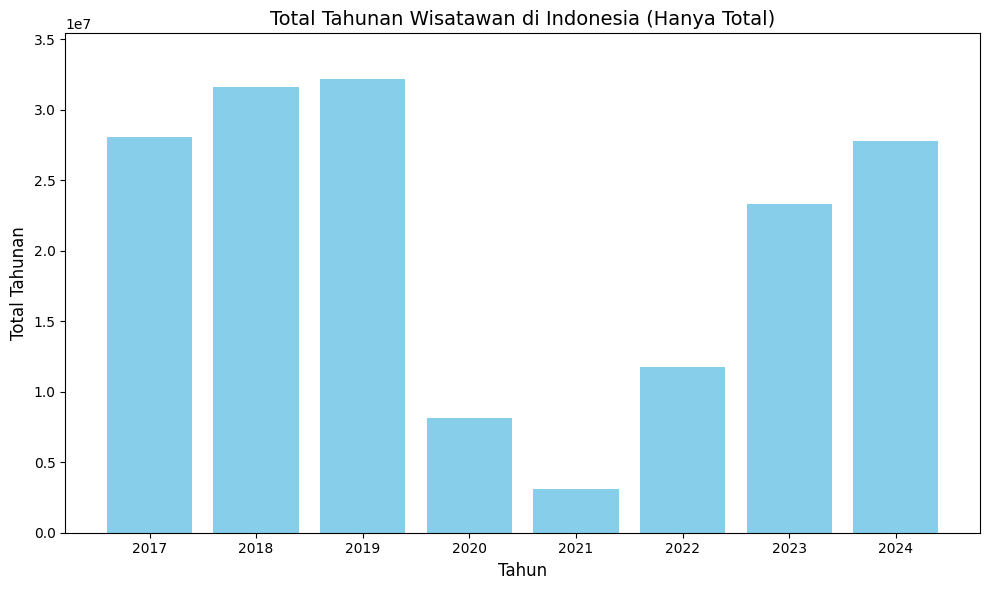

In [ ]:
import matplotlib.pyplot as plt
# Membuat bar plot dengan penyesuaian sumbu y untuk memastikan grafik lebih jelas
plt.figure(figsize=(10, 6))

# Memplot grafik batang hanya untuk data 'total' dengan penyesuaian sumbu y
plt.bar(df['Tahun'], df['Tahunan'], color='skyblue')

# Menyesuaikan batas sumbu y untuk memastikan grafik lebih terbaca
plt.ylim(0, max(df['Tahunan']) * 1.1)

plt.title('Total Tahunan Wisatawan di Indonesia (Hanya Total)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Tahunan', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Pintu Masuk  a. pintu udara  b. pintu laut  c. pintu darat
Tahun                                                     
2017               19343327        5567327         3174995
2018               20179580        6430858         5016226
2019               19671431        8323283         4225251
2020                3429164        2051222         2631520
2021                 276505         832965         2011653
2022                6594074        3455694         1734360
2023               15947325        5410777         2003617
2024               19663124        5624023         2523764


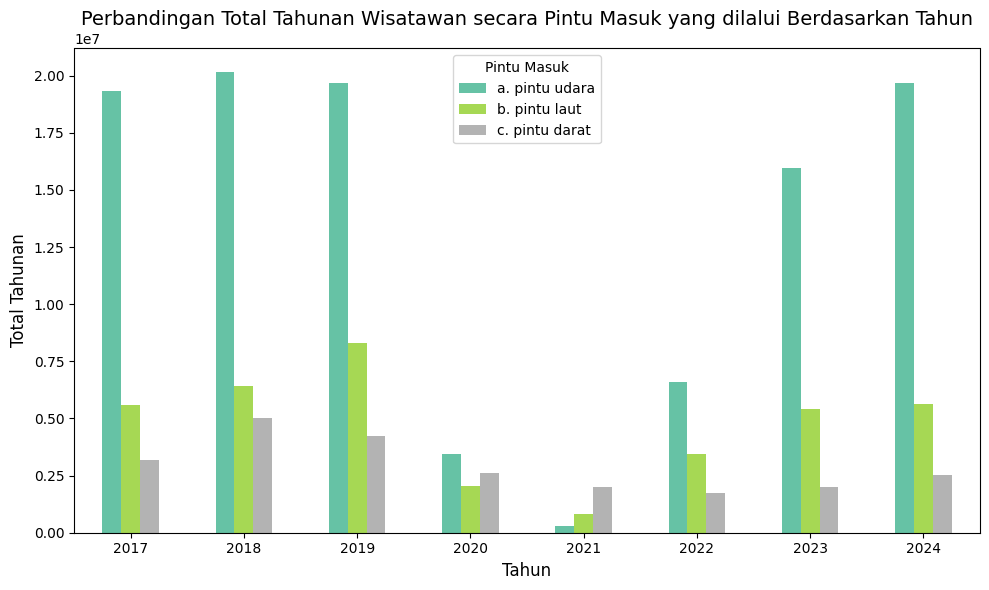

In [ ]:
# Memfilter data untuk Pintu Masuk Malaysia, Indonesia, dan Brunei
df_comparison = df[df['Pintu Masuk'].isin(['a. pintu udara', 'b. pintu laut', 'c. pintu darat'])]

# Membuat tabel perbandingan berdasarkan Tahun dan Tahunan
comparison_table = df_comparison.pivot_table(values='Tahunan', index='Tahun', columns='Pintu Masuk', aggfunc='sum')

# Menampilkan tabel perbandingan
print(comparison_table)

# Membuat bar plot untuk perbandingan berdasarkan Tahun
plt.figure(figsize=(10,6))

# Menggunakan data perbandingan dan memplot berdasarkan kolom 'Tahun' dan 'Tahunan'
comparison_table.plot(kind='bar', stacked=False, colormap='Set2', ax=plt.gca())

plt.title('Perbandingan Total Tahunan Wisatawan secara Pintu Masuk yang dilalui Berdasarkan Tahun', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Tahunan', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

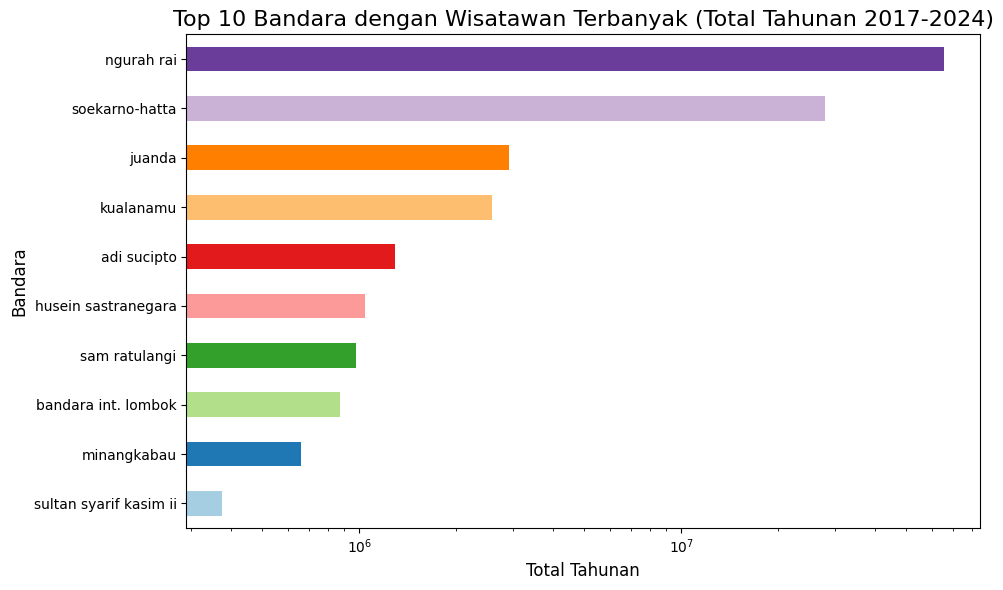

In [ ]:
# Memfilter data untuk bandara yang disebutkan antara tahun 2017 hingga 2024
airport_names = [
    'ngurah rai', 'soekarno-hatta', 'juanda', 'kualanamu', 'husein sastranegara',
    'adi sucipto', 'bandara int. lombok', 'sam ratulangi', 'minangkabau',
    'sultan syarif kasim ii', 'sultan iskandar muda', 'ahmad yani', 'supadio',
    'hasanuddin', 'sultan badaruddin ii'
]

# Memfilter data berdasarkan bandara dan tahun antara 2017 dan 2024
df_filtered_airports = df[(df['Pintu Masuk'].isin(airport_names)) & (df['Tahun'] >= 2017) & (df['Tahun'] <= 2024)]

# Mengelompokkan data berdasarkan 'Tahun' dan 'Pintu Masuk', kemudian menjumlahkan nilai 'Tahunan'
df_grouped = df_filtered_airports.groupby(['Tahun', 'Pintu Masuk'])['Tahunan'].sum().reset_index()

# Menjumlahkan total tahunan per bandara untuk tahun 2017 hingga 2024
top_10_airports = df_grouped.groupby('Pintu Masuk')['Tahunan'].sum().sort_values(ascending=False).head(10)

top_10_airports_sorted = top_10_airports.sort_values(ascending=True)

# Membuat bar plot horizontal dengan urutan terbanyak di atas
plt.figure(figsize=(10, 6))

# Membuat grafik batang horizontal dengan urutan dari yang terbanyak
top_10_airports_sorted.plot(kind='barh', color=plt.cm.Paired(range(len(top_10_airports_sorted))), legend=False)

# Menambahkan judul dan label
plt.title('Top 10 Bandara dengan Wisatawan Terbanyak (Total Tahunan 2017-2024)', fontsize=16)
plt.xlabel('Total Tahunan', fontsize=12)
plt.ylabel('Bandara', fontsize=12)

# Mengatur skala logaritmik pada sumbu X
plt.xscale('log')

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [ ]:
df_save = df[df['Pintu Masuk'].isin(['total'])]

In [ ]:
df_save.to_excel('df1.xlsx'),

(None,)

#epoch 80

In [ ]:
df0=pd.read_excel('df1.xlsx')

In [ ]:
df0.head()

,Unnamed: 0,Pintu Masuk,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Tahun
0,34,total,1107968,1023388,1059777,1171386,1148588,1144001,1370591,1393243,1250231,1161565,1062030,1147031,28081615,2017
1,34,total,1097839,1197503,1363426,1302321,1242705,1322674,1547231,1511021,1370943,1291605,1157483,1405554,31622628,2018
2,34,total,1201735,1243996,1311911,1274231,1249536,1434103,1468173,1530268,1388719,1346434,1280781,1377067,32215927,2019
3,34,total,1290411,872765,486155,158066,161842,156561,155742,161549,148984,152293,144476,164079,8107866,2020
4,34,total,126515,105788,119979,112756,139433,126844,127249,118533,120100,146137,150577,163619,3117081,2021


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8 non-null      int64 
 1   Pintu Masuk  8 non-null      object
 2   Januari      8 non-null      int64 
 3   Februari     8 non-null      int64 
 4   Maret        8 non-null      int64 
 5   April        8 non-null      int64 
 6   Mei          8 non-null      int64 
 7   Juni         8 non-null      int64 
 8   Juli         8 non-null      int64 
 9   Agustus      8 non-null      int64 
 10  September    8 non-null      int64 
 11  Oktober      8 non-null      int64 
 12  November     8 non-null      int64 
 13  Desember     8 non-null      int64 
 14  Tahunan      8 non-null      int64 
 15  Tahun        8 non-null      int64 
dtypes: int64(15), object(1)
memory usage: 1.1+ KB


In [ ]:
# Mengubah format data dari bentuk lebar (wide) ke panjang (long)
df0 = df0.melt(id_vars=['Pintu Masuk', 'Tahun'],
                  value_vars=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli',
                              'Agustus', 'September', 'Oktober', 'November', 'Desember'],
                  var_name='Bulan', value_name='Jumlah_Wisatawan')

In [ ]:
bulan_mapping = {"Januari": 1, "Februari": 2, "Maret": 3, "April": 4, "Mei": 5, "Juni": 6,
                 "Juli": 7, "Agustus": 8, "September": 9, "Oktober": 10, "November": 11, "Desember": 12}
df0['Bulan'] = df0['Bulan'].map(bulan_mapping)

In [ ]:
df0.head()

,Pintu Masuk,Tahun,Bulan,Jumlah_Wisatawan
0,total,2017,1,1107968
1,total,2018,1,1097839
2,total,2019,1,1201735
3,total,2020,1,1290411
4,total,2021,1,126515


In [ ]:
# Mengonversi kolom 'Tahun' ke string, lalu menggabungkan dengan kolom 'Bulan'
df0['Tahun-Bulan'] = pd.to_datetime(df0['Tahun'].astype(str) + '-' + df0['Bulan'].astype(str) + '-01')

In [ ]:
df0 = df0.sort_values('Tahun-Bulan')
data = df0['Jumlah_Wisatawan'].values.reshape(-1, 1)

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Pintu Masuk       96 non-null     object        
 1   Tahun             96 non-null     int64         
 2   Bulan             96 non-null     int64         
 3   Jumlah_Wisatawan  96 non-null     int64         
 4   Tahun-Bulan       96 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.5+ KB


In [ ]:
# 2. Normalisasi
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()  # menggunakan median & IQR, tidak terpengaruh outlier
data_scaled = scaler.fit_transform(data)

pakai standarscaler dikarenakan ada fluktuasi alami nilai ekstrem

In [ ]:
# 3. Membuat Dataset
# mengubah data time-series menjadi format yang bisa diproses oleh LSTM
def create_dataset(data, time_steps=12):#timesteps 12 pola bulanan terakhir setahun
    X, y = [], []
    for i in range(len(data)-time_steps):
        X.append(data[i:(i+time_steps), 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y) #berbentuk array 2D

X, y = create_dataset(data_scaled, time_steps=12) #ke array 3D (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# 4. Split Data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# 5. Bangun Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(12, 1), return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)




1.  Layer pertama: LSTM(64, activation='relu', input_shape=(12, 1), return_sequences=True) akan memproses input dengan panjang urutan
(timestep) sebanyak 12 langkah waktu(bulan), dan pada setiap langkah waktu hanya ada satu fitur. return_sequences=True berarti layer pertama akan mengeluarkan seluruh urutan output (bukan hanya output terakhir).

2.  Layer kedua: LSTM(32, activation='relu') tidak menerima urutan, tetapi hanya menerima output dari layer pertama yang berupa urutan hasil transformasi dari 12 timestep.

3. Layer ketiga: Dense(1) akan menghasilkan satu nilai sebagai output akhir



In [ ]:
# 6. Training
history = model.fit(X_train, y_train, epochs=80, batch_size=32,
                   validation_data=(X_test, y_test), verbose=1)


Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 429ms/step - loss: 0.3329 - val_loss: 0.0201
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.2898 - val_loss: 0.0245
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.2481 - val_loss: 0.0304
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2294 - val_loss: 0.0392
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1733 - val_loss: 0.0522
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1466 - val_loss: 0.0711
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.1313 - val_loss: 0.0936
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1267 - val_loss: 0.1036
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1418 - val_loss: 0.0849
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1261 - val_loss: 0.0624
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1106 - val_loss: 0.0421
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0997 - val_loss: 0.0288

In [ ]:
# 7. Prediksi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [ ]:
# Inverse Scaling
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
# 8. Evaluasi
def calculate_mape(actual, predicted):
    # Mengabaikan data dengan nilai nol
    non_zero_indices = actual != 0
    actual_non_zero = actual[non_zero_indices]
    predicted_non_zero = predicted[non_zero_indices]
    return np.mean(np.abs((actual_non_zero - predicted_non_zero) / actual_non_zero)) * 100

train_mae = mean_absolute_error(y_train_actual, train_predict)
test_mae = mean_absolute_error(y_test_actual, test_predict)
train_mape = calculate_mape(y_train_actual, train_predict)
test_mape = calculate_mape(y_test_actual, test_predict)

print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")

Train MAE: 125056.56
Test MAE: 103122.98
Train MAPE: 47.68%
Test MAPE: 9.90%


In [ ]:

# Ambil 12 bulan terakhir sebagai input prediksi
last_12_months = df0['Jumlah_Wisatawan'].values[-12:].reshape(1, -1, 1)  # Data sudah dinormalisasi
last_12_months_scaled = scaler.transform(last_12_months.reshape(-1, 1)).reshape(1, 12, 1)

In [ ]:
# Fungsi prediksi multi-step
def predict_next_six_months(model, initial_input):
    predictions = []
    current_input = initial_input.copy()

    for _ in range(6):  # Prediksi 6 bulan ke depan
        next_pred_scaled = model.predict(current_input, verbose=0)
        next_pred = scaler.inverse_transform(next_pred_scaled)[0][0]
        predictions.append(next_pred)
        # Update input untuk prediksi berikutnya
        current_input = np.append(current_input[:, 1:, :], next_pred_scaled.reshape(1, 1, 1), axis=1)

    return predictions

In [ ]:
# Dapatkan prediksi
monthly_predictions = predict_next_six_months(model, last_12_months_scaled)
months_2025 = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni']

In [ ]:
# Tampilkan hasil
print("=== Prediksi Kedatangan Wisatawan 2025 ===")
for month, pred in zip(months_2025, monthly_predictions):
    print(f"{month}: {int(pred):,} wisatawan")

=== Prediksi Kedatangan Wisatawan 2025 ===
Januari: 1,244,224 wisatawan
Februari: 1,246,412 wisatawan
Maret: 1,253,461 wisatawan
April: 1,265,812 wisatawan
Mei: 1,283,703 wisatawan
Juni: 1,306,470 wisatawan


In [ ]:
# Timeline untuk training, test, dan prediksi 2025
train_dates = df0['Tahun-Bulan'].iloc[12 : split+12]  # 12 bulan pertama jadi input
test_dates = df0['Tahun-Bulan'].iloc[split+12 : split+12+len(test_predict)]
prediction_date = pd.to_datetime('2025-06-01')

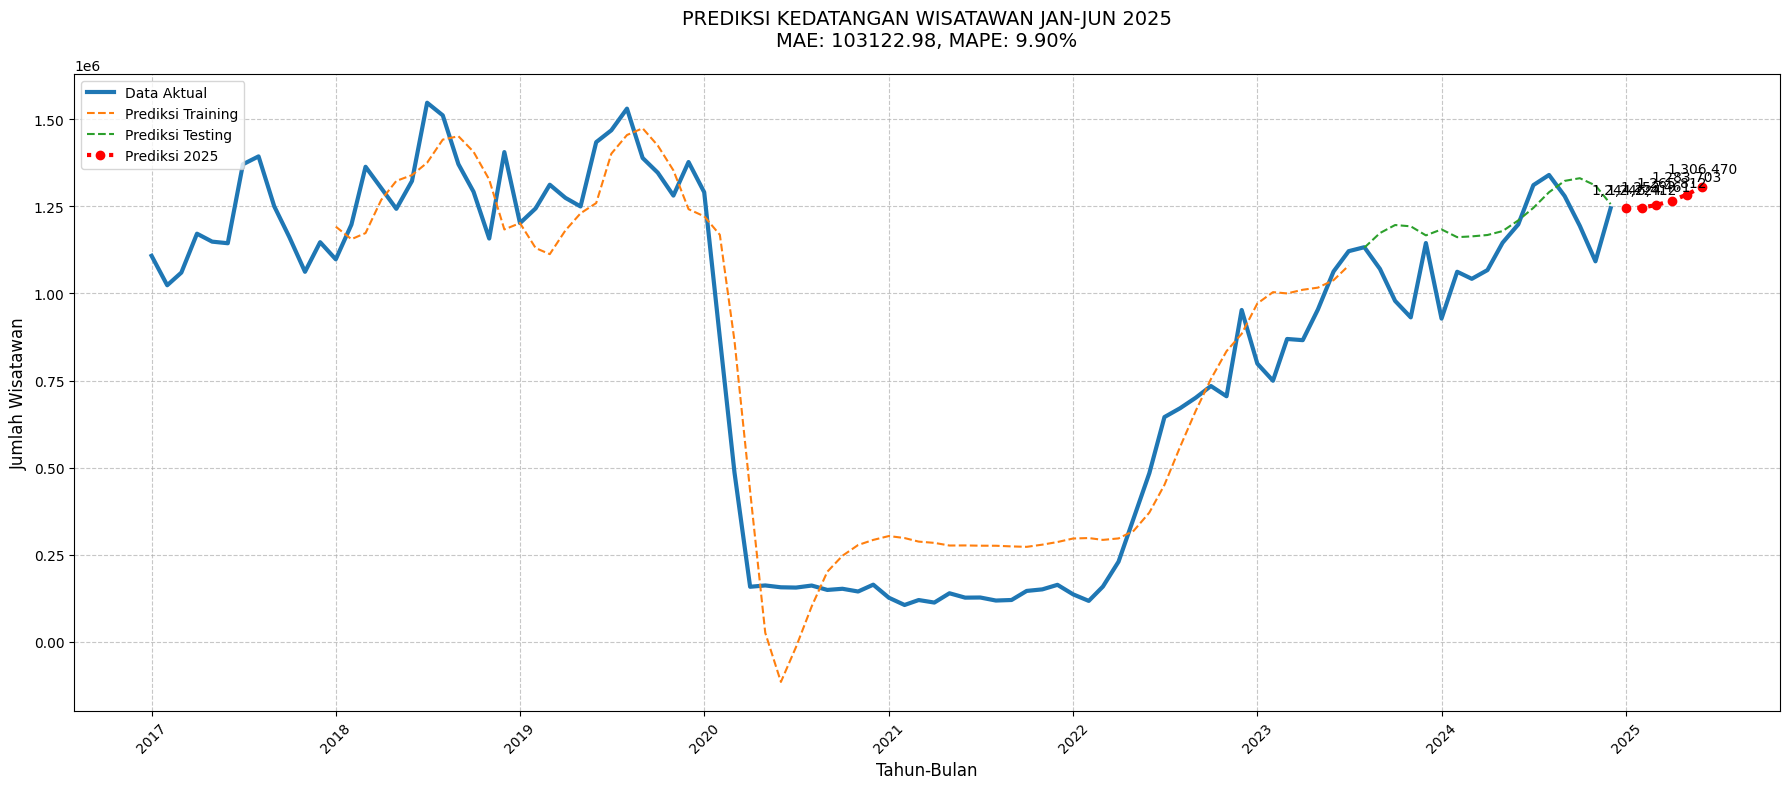

In [ ]:
# Generate tanggal prediksi
last_date = df0['Tahun-Bulan'].iloc[-1]
pred_dates = pd.date_range(
    start=last_date + pd.DateOffset(months=1),
    periods=6,
    freq='MS'
)

plt.figure(figsize=(18, 8))

# Plot data historis
plt.plot(df0['Tahun-Bulan'],
         df0['Jumlah_Wisatawan'],
         label='Data Aktual',
         color='#1f77b4',
         linewidth=3)

# Plot prediksi training/testing (jika ada)
plt.plot(train_dates, train_predict,
         label='Prediksi Training',
         linestyle='--',
         color='#ff7f0e')

plt.plot(test_dates, test_predict,
         label='Prediksi Testing',
         linestyle='--',
         color='#2ca02c')

# Plot prediksi 2025
plt.plot(pred_dates,
         monthly_predictions,
         label='Prediksi 2025',
         color='red',
         marker='o',
         linestyle=':',
         linewidth=3)

# Anotasi nilai prediksi
for date, pred in zip(pred_dates, monthly_predictions):
    plt.annotate(f"{int(pred):,}",
                 (date, pred),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

# Formatting
plt.title('PREDIKSI KEDATANGAN WISATAWAN JAN-JUN 2025\nMAE: {:.2f}, MAPE: {:.2f}%'.format(test_mae, test_mape),
          fontsize=14, pad=20)
plt.xlabel('Tahun-Bulan', fontsize=12)
plt.ylabel('Jumlah Wisatawan', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

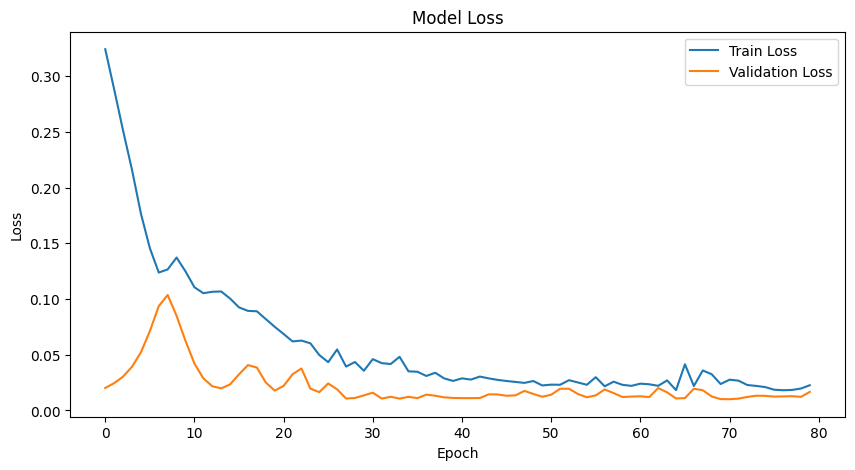

In [ ]:
# 10. Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#epoch 100

In [ ]:
df1=pd.read_excel('df1.xlsx')

In [ ]:
df1.head()

,Unnamed: 0,Pintu Masuk,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Tahun
0,34,total,1107968,1023388,1059777,1171386,1148588,1144001,1370591,1393243,1250231,1161565,1062030,1147031,28081615,2017
1,34,total,1097839,1197503,1363426,1302321,1242705,1322674,1547231,1511021,1370943,1291605,1157483,1405554,31622628,2018
2,34,total,1201735,1243996,1311911,1274231,1249536,1434103,1468173,1530268,1388719,1346434,1280781,1377067,32215927,2019
3,34,total,1290411,872765,486155,158066,161842,156561,155742,161549,148984,152293,144476,164079,8107866,2020
4,34,total,126515,105788,119979,112756,139433,126844,127249,118533,120100,146137,150577,163619,3117081,2021


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8 non-null      int64 
 1   Pintu Masuk  8 non-null      object
 2   Januari      8 non-null      int64 
 3   Februari     8 non-null      int64 
 4   Maret        8 non-null      int64 
 5   April        8 non-null      int64 
 6   Mei          8 non-null      int64 
 7   Juni         8 non-null      int64 
 8   Juli         8 non-null      int64 
 9   Agustus      8 non-null      int64 
 10  September    8 non-null      int64 
 11  Oktober      8 non-null      int64 
 12  November     8 non-null      int64 
 13  Desember     8 non-null      int64 
 14  Tahunan      8 non-null      int64 
 15  Tahun        8 non-null      int64 
dtypes: int64(15), object(1)
memory usage: 1.1+ KB


In [ ]:
# Mengubah format data dari bentuk lebar (wide) ke panjang (long)
df1 = df1.melt(id_vars=['Pintu Masuk', 'Tahun'],
                  value_vars=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli',
                              'Agustus', 'September', 'Oktober', 'November', 'Desember'],
                  var_name='Bulan', value_name='Jumlah_Wisatawan')

In [ ]:
bulan_mapping = {"Januari": 1, "Februari": 2, "Maret": 3, "April": 4, "Mei": 5, "Juni": 6,
                 "Juli": 7, "Agustus": 8, "September": 9, "Oktober": 10, "November": 11, "Desember": 12}
df1['Bulan'] = df1['Bulan'].map(bulan_mapping)

In [ ]:
df1.head()

,Pintu Masuk,Tahun,Bulan,Jumlah_Wisatawan
0,total,2017,1,1107968
1,total,2018,1,1097839
2,total,2019,1,1201735
3,total,2020,1,1290411
4,total,2021,1,126515


In [ ]:
# Mengonversi kolom 'Tahun' ke string, lalu menggabungkan dengan kolom 'Bulan'
df1['Tahun-Bulan'] = pd.to_datetime(df1['Tahun'].astype(str) + '-' + df1['Bulan'].astype(str) + '-01')

In [ ]:
df1 = df1.sort_values('Tahun-Bulan')
data = df1['Jumlah_Wisatawan'].values.reshape(-1, 1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Pintu Masuk       96 non-null     object        
 1   Tahun             96 non-null     int64         
 2   Bulan             96 non-null     int64         
 3   Jumlah_Wisatawan  96 non-null     int64         
 4   Tahun-Bulan       96 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.5+ KB


In [ ]:
# 2. Normalisasi
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()  # menggunakan median & IQR, tidak terpengaruh outlier
data_scaled = scaler.fit_transform(data)

In [ ]:
# 3. Membuat Dataset
def create_dataset(data, time_steps=12):
    X, y = [], []
    for i in range(len(data)-time_steps):
        X.append(data[i:(i+time_steps), 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled, time_steps=12)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# 4. Split Data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# 5. Bangun Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(12, 1), return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)




1.  Layer pertama: LSTM(64, activation='relu', input_shape=(12, 1), return_sequences=True) akan memproses input dengan panjang urutan
(timestep) sebanyak 12 langkah waktu(bulan), dan pada setiap langkah waktu hanya ada satu fitur. return_sequences=True berarti layer pertama akan mengeluarkan seluruh urutan output (bukan hanya output terakhir).

2.  Layer kedua: LSTM(32, activation='relu') tidak menerima urutan, tetapi hanya menerima output dari layer pertama yang berupa urutan hasil transformasi dari 12 timestep.

3. Layer ketiga: Dense(1) akan menghasilkan satu nilai sebagai output akhir



In [ ]:
# 6. Training
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                   validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - loss: 0.3358 - val_loss: 0.0189
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.2907 - val_loss: 0.0216
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2584 - val_loss: 0.0259
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2376 - val_loss: 0.0317
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1959 - val_loss: 0.0393
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1630 - val_loss: 0.0494
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1346 - val_loss: 0.0611
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1162 - val_loss: 0.0744
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1203 - val_loss: 0.0715
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1241 - val_loss: 0.0581
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1008 - val_loss: 0.0448
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1097 - val_l

In [ ]:
# 7. Prediksi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
# Inverse Scaling
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
# 8. Evaluasi
def calculate_mape(actual, predicted):
    # Mengabaikan data dengan nilai nol
    non_zero_indices = actual != 0
    actual_non_zero = actual[non_zero_indices]
    predicted_non_zero = predicted[non_zero_indices]
    return np.mean(np.abs((actual_non_zero - predicted_non_zero) / actual_non_zero)) * 100

train_mae = mean_absolute_error(y_train_actual, train_predict)
test_mae = mean_absolute_error(y_test_actual, test_predict)
train_mape = calculate_mape(y_train_actual, train_predict)
test_mape = calculate_mape(y_test_actual, test_predict)

print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")

Train MAE: 110675.73
Test MAE: 86585.21
Train MAPE: 29.88%
Test MAPE: 8.09%


In [ ]:

# Ambil 12 bulan terakhir sebagai input prediksi
last_12_months = df1['Jumlah_Wisatawan'].values[-12:].reshape(1, -1, 1)  # Data sudah dinormalisasi
last_12_months_scaled = scaler.transform(last_12_months.reshape(-1, 1)).reshape(1, 12, 1)

In [ ]:
# Fungsi prediksi multi-step
def predict_next_six_months(model, initial_input):
    predictions = []
    current_input = initial_input.copy()

    for _ in range(6):  # Prediksi 6 bulan ke depan
        next_pred_scaled = model.predict(current_input, verbose=0)
        next_pred = scaler.inverse_transform(next_pred_scaled)[0][0]
        predictions.append(next_pred)
        # Update input untuk prediksi berikutnya
        current_input = np.append(current_input[:, 1:, :], next_pred_scaled.reshape(1, 1, 1), axis=1)

    return predictions

In [ ]:
# Dapatkan prediksi
monthly_predictions = predict_next_six_months(model, last_12_months_scaled)
months_2025 = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni']

In [ ]:
# Tampilkan hasil
print("=== Prediksi Kedatangan Wisatawan 2025 ===")
for month, pred in zip(months_2025, monthly_predictions):
    print(f"{month}: {int(pred):,} wisatawan")

=== Prediksi Kedatangan Wisatawan 2025 ===
Januari: 1,151,853 wisatawan
Februari: 1,115,943 wisatawan
Maret: 1,082,736 wisatawan
April: 1,057,768 wisatawan
Mei: 1,047,605 wisatawan
Juni: 1,058,148 wisatawan


In [ ]:
# Timeline untuk training, test, dan prediksi 2025
train_dates = df1['Tahun-Bulan'].iloc[12 : split+12]  # 12 bulan pertama jadi input
test_dates = df1['Tahun-Bulan'].iloc[split+12 : split+12+len(test_predict)]
prediction_date = pd.to_datetime('2025-06-01')

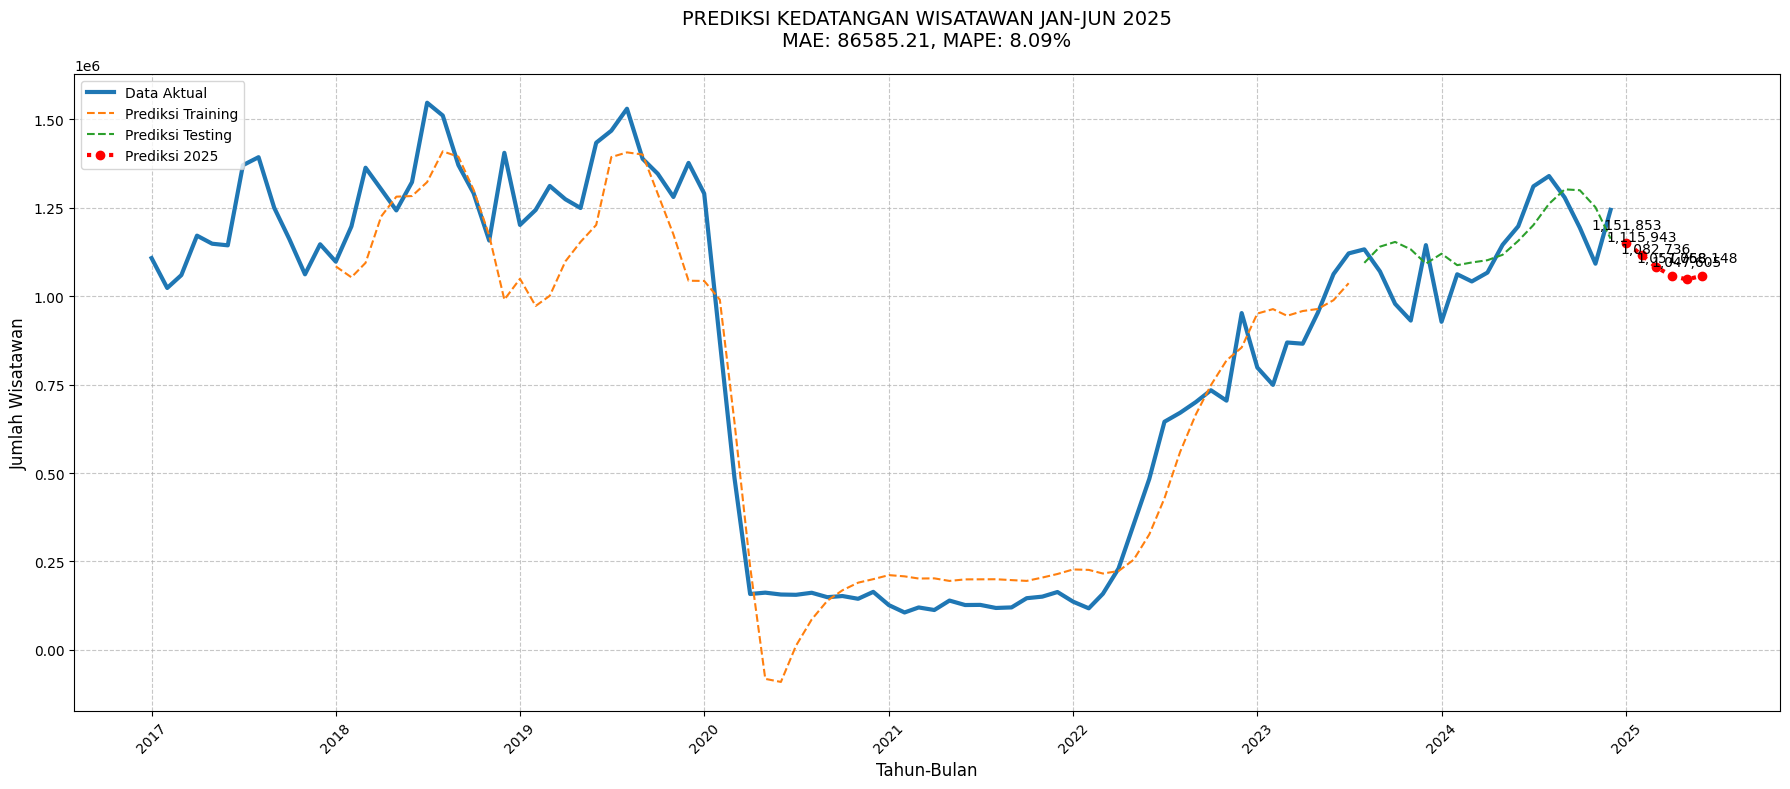

In [ ]:
# Generate tanggal prediksi
last_date = df1['Tahun-Bulan'].iloc[-1]
pred_dates = pd.date_range(
    start=last_date + pd.DateOffset(months=1),
    periods=6,
    freq='MS'
)

plt.figure(figsize=(18, 8))

# Plot data historis
plt.plot(df1['Tahun-Bulan'],
         df1['Jumlah_Wisatawan'],
         label='Data Aktual',
         color='#1f77b4',
         linewidth=3)

# Plot prediksi training/testing (jika ada)
plt.plot(train_dates, train_predict,
         label='Prediksi Training',
         linestyle='--',
         color='#ff7f0e')

plt.plot(test_dates, test_predict,
         label='Prediksi Testing',
         linestyle='--',
         color='#2ca02c')

# Plot prediksi 2025
plt.plot(pred_dates,
         monthly_predictions,
         label='Prediksi 2025',
         color='red',
         marker='o',
         linestyle=':',
         linewidth=3)

# Anotasi nilai prediksi
for date, pred in zip(pred_dates, monthly_predictions):
    plt.annotate(f"{int(pred):,}",
                 (date, pred),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

# Formatting
plt.title('PREDIKSI KEDATANGAN WISATAWAN JAN-JUN 2025\nMAE: {:.2f}, MAPE: {:.2f}%'.format(test_mae, test_mape),
          fontsize=14, pad=20)
plt.xlabel('Tahun-Bulan', fontsize=12)
plt.ylabel('Jumlah Wisatawan', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

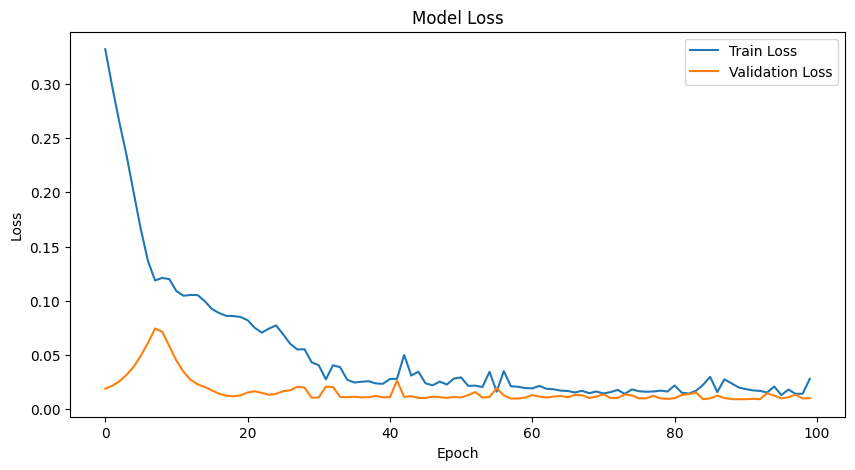

In [ ]:
# 10. Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#epoch 120

In [ ]:
df2=pd.read_excel('df1.xlsx')

In [ ]:
df2.head()

,Unnamed: 0,Pintu Masuk,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Tahun
0,34,total,1107968,1023388,1059777,1171386,1148588,1144001,1370591,1393243,1250231,1161565,1062030,1147031,28081615,2017
1,34,total,1097839,1197503,1363426,1302321,1242705,1322674,1547231,1511021,1370943,1291605,1157483,1405554,31622628,2018
2,34,total,1201735,1243996,1311911,1274231,1249536,1434103,1468173,1530268,1388719,1346434,1280781,1377067,32215927,2019
3,34,total,1290411,872765,486155,158066,161842,156561,155742,161549,148984,152293,144476,164079,8107866,2020
4,34,total,126515,105788,119979,112756,139433,126844,127249,118533,120100,146137,150577,163619,3117081,2021


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8 non-null      int64 
 1   Pintu Masuk  8 non-null      object
 2   Januari      8 non-null      int64 
 3   Februari     8 non-null      int64 
 4   Maret        8 non-null      int64 
 5   April        8 non-null      int64 
 6   Mei          8 non-null      int64 
 7   Juni         8 non-null      int64 
 8   Juli         8 non-null      int64 
 9   Agustus      8 non-null      int64 
 10  September    8 non-null      int64 
 11  Oktober      8 non-null      int64 
 12  November     8 non-null      int64 
 13  Desember     8 non-null      int64 
 14  Tahunan      8 non-null      int64 
 15  Tahun        8 non-null      int64 
dtypes: int64(15), object(1)
memory usage: 1.1+ KB


In [ ]:
# Mengubah format data dari bentuk lebar (wide) ke panjang (long)
df2 = df2.melt(id_vars=['Pintu Masuk', 'Tahun'],
                  value_vars=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli',
                              'Agustus', 'September', 'Oktober', 'November', 'Desember'],
                  var_name='Bulan', value_name='Jumlah_Wisatawan')

In [ ]:
bulan_mapping = {"Januari": 1, "Februari": 2, "Maret": 3, "April": 4, "Mei": 5, "Juni": 6,
                 "Juli": 7, "Agustus": 8, "September": 9, "Oktober": 10, "November": 11, "Desember": 12}
df2['Bulan'] = df2['Bulan'].map(bulan_mapping)

In [ ]:
df2.head()

,Pintu Masuk,Tahun,Bulan,Jumlah_Wisatawan
0,total,2017,1,1107968
1,total,2018,1,1097839
2,total,2019,1,1201735
3,total,2020,1,1290411
4,total,2021,1,126515


In [ ]:
# Mengonversi kolom 'Tahun' ke string, lalu menggabungkan dengan kolom 'Bulan'
df2['Tahun-Bulan'] = pd.to_datetime(df2['Tahun'].astype(str) + '-' + df2['Bulan'].astype(str) + '-01')

In [ ]:
df2 = df2.sort_values('Tahun-Bulan')
data = df2['Jumlah_Wisatawan'].values.reshape(-1, 1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Pintu Masuk       96 non-null     object        
 1   Tahun             96 non-null     int64         
 2   Bulan             96 non-null     int64         
 3   Jumlah_Wisatawan  96 non-null     int64         
 4   Tahun-Bulan       96 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.5+ KB


In [ ]:
# 2. Normalisasi
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()  # menggunakan median & IQR, tidak terpengaruh outlier
data_scaled = scaler.fit_transform(data)

pakai standarscaler dikarenakan ada fluktuasi alami nilai ekstrem

In [ ]:
# 3. Membuat Dataset
def create_dataset(data, time_steps=12):
    X, y = [], []
    for i in range(len(data)-time_steps):
        X.append(data[i:(i+time_steps), 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled, time_steps=12)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# 4. Split Data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# 5. Bangun Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(12, 1), return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)




1.  Layer pertama: LSTM(64, activation='relu', input_shape=(12, 1), return_sequences=True) akan memproses input dengan panjang urutan
(timestep) sebanyak 12 langkah waktu(bulan), dan pada setiap langkah waktu hanya ada satu fitur. return_sequences=True berarti layer pertama akan mengeluarkan seluruh urutan output (bukan hanya output terakhir).

2.  Layer kedua: LSTM(32, activation='relu') tidak menerima urutan, tetapi hanya menerima output dari layer pertama yang berupa urutan hasil transformasi dari 12 timestep.

3. Layer ketiga: Dense(1) akan menghasilkan satu nilai sebagai output akhir



In [ ]:
# 6. Training
history = model.fit(X_train, y_train, epochs=120, batch_size=32,
                   validation_data=(X_test, y_test), verbose=1)


Epoch 1/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - loss: 0.4131 - val_loss: 0.0188
Epoch 2/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3582 - val_loss: 0.0209
Epoch 3/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3059 - val_loss: 0.0230
Epoch 4/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2864 - val_loss: 0.0263
Epoch 5/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2431 - val_loss: 0.0306
Epoch 6/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2039 - val_loss: 0.0361
Epoch 7/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1775 - val_loss: 0.0434
Epoch 8/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1339 - val_loss: 0.0496
Epoch 9/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1119 - val_loss: 0.0524
Epoch 10/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1161 - val_loss: 0.0481
Epoch 11/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1081 - val_loss: 0.0348
Epoch 12/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0989 - val_l

In [ ]:
# 7. Prediksi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [ ]:
# Inverse Scaling
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
# 8. Evaluasi
def calculate_mape(actual, predicted):
    # Mengabaikan data dengan nilai nol
    non_zero_indices = actual != 0
    actual_non_zero = actual[non_zero_indices]
    predicted_non_zero = predicted[non_zero_indices]
    return np.mean(np.abs((actual_non_zero - predicted_non_zero) / actual_non_zero)) * 100

train_mae = mean_absolute_error(y_train_actual, train_predict)
test_mae = mean_absolute_error(y_test_actual, test_predict)
train_mape = calculate_mape(y_train_actual, train_predict)
test_mape = calculate_mape(y_test_actual, test_predict)

print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")

Train MAE: 149595.62
Test MAE: 86307.12
Train MAPE: 30.35%
Test MAPE: 7.87%


In [ ]:

# Ambil 12 bulan terakhir sebagai input prediksi
last_12_months = df2['Jumlah_Wisatawan'].values[-12:].reshape(1, -1, 1)  # Data sudah dinormalisasi
last_12_months_scaled = scaler.transform(last_12_months.reshape(-1, 1)).reshape(1, 12, 1)

In [ ]:
# Fungsi prediksi multi-step
def predict_next_six_months(model, initial_input):
    predictions = []
    current_input = initial_input.copy()

    for _ in range(6):  # Prediksi 6 bulan ke depan
        next_pred_scaled = model.predict(current_input, verbose=0)
        next_pred = scaler.inverse_transform(next_pred_scaled)[0][0]
        predictions.append(next_pred)
        # Update input untuk prediksi berikutnya
        current_input = np.append(current_input[:, 1:, :], next_pred_scaled.reshape(1, 1, 1), axis=1)

    return predictions

In [ ]:
# Dapatkan prediksi
monthly_predictions = predict_next_six_months(model, last_12_months_scaled)
months_2025 = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni']

In [ ]:
# Tampilkan hasil
print("=== Prediksi Kedatangan Wisatawan 2025 ===")
for month, pred in zip(months_2025, monthly_predictions):
    print(f"{month}: {int(pred):,} wisatawan")

=== Prediksi Kedatangan Wisatawan 2025 ===
Januari: 1,150,649 wisatawan
Februari: 1,107,741 wisatawan
Maret: 1,066,937 wisatawan
April: 1,028,563 wisatawan
Mei: 998,396 wisatawan
Juni: 985,107 wisatawan


In [ ]:
# Timeline untuk training, test, dan prediksi 2025
train_dates = df2['Tahun-Bulan'].iloc[12 : split+12]  # 12 bulan pertama jadi input
test_dates = df2['Tahun-Bulan'].iloc[split+12 : split+12+len(test_predict)]
prediction_date = pd.to_datetime('2025-06-01')

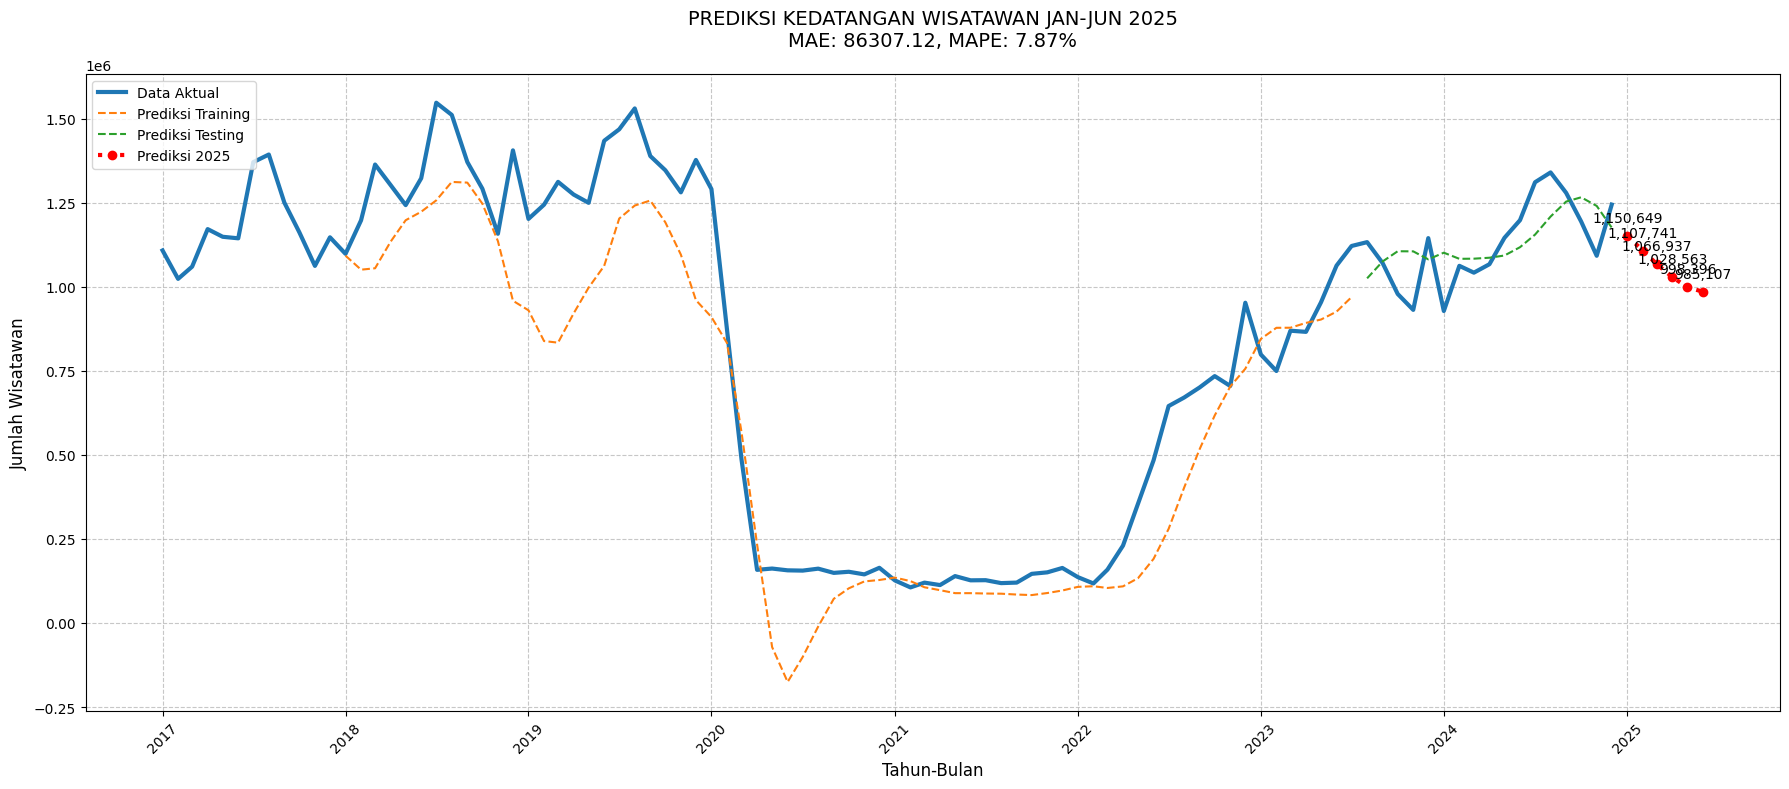

In [ ]:
# Generate tanggal prediksi
last_date = df2['Tahun-Bulan'].iloc[-1]
pred_dates = pd.date_range(
    start=last_date + pd.DateOffset(months=1),
    periods=6,
    freq='MS'
)

plt.figure(figsize=(18, 8))

# Plot data historis
plt.plot(df2['Tahun-Bulan'],
         df2['Jumlah_Wisatawan'],
         label='Data Aktual',
         color='#1f77b4',
         linewidth=3)

# Plot prediksi training/testing (jika ada)
plt.plot(train_dates, train_predict,
         label='Prediksi Training',
         linestyle='--',
         color='#ff7f0e')

plt.plot(test_dates, test_predict,
         label='Prediksi Testing',
         linestyle='--',
         color='#2ca02c')

# Plot prediksi 2025
plt.plot(pred_dates,
         monthly_predictions,
         label='Prediksi 2025',
         color='red',
         marker='o',
         linestyle=':',
         linewidth=3)

# Anotasi nilai prediksi
for date, pred in zip(pred_dates, monthly_predictions):
    plt.annotate(f"{int(pred):,}",
                 (date, pred),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

# Formatting
plt.title('PREDIKSI KEDATANGAN WISATAWAN JAN-JUN 2025\nMAE: {:.2f}, MAPE: {:.2f}%'.format(test_mae, test_mape),
          fontsize=14, pad=20)
plt.xlabel('Tahun-Bulan', fontsize=12)
plt.ylabel('Jumlah Wisatawan', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

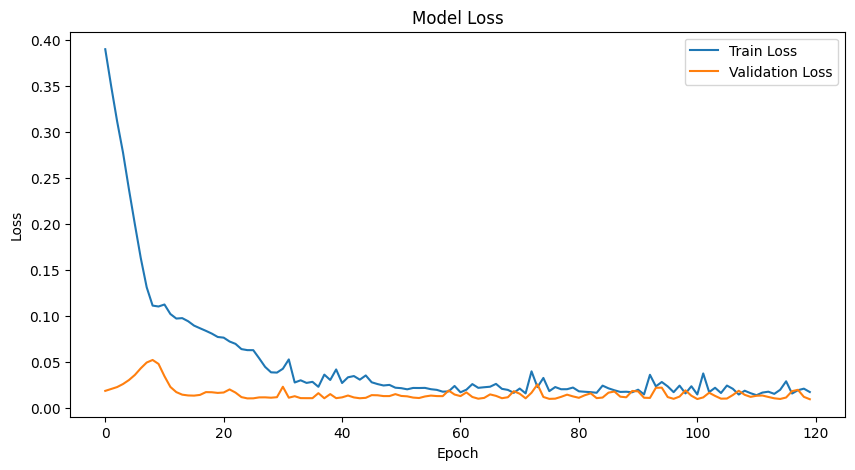

In [ ]:
# 10. Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#campur

In [ ]:
dfc=pd.read_excel('df1.xlsx')

In [ ]:
dfc.head()

,Unnamed: 0,Pintu Masuk,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Tahun
0,34,total,1107968,1023388,1059777,1171386,1148588,1144001,1370591,1393243,1250231,1161565,1062030,1147031,28081615,2017
1,34,total,1097839,1197503,1363426,1302321,1242705,1322674,1547231,1511021,1370943,1291605,1157483,1405554,31622628,2018
2,34,total,1201735,1243996,1311911,1274231,1249536,1434103,1468173,1530268,1388719,1346434,1280781,1377067,32215927,2019
3,34,total,1290411,872765,486155,158066,161842,156561,155742,161549,148984,152293,144476,164079,8107866,2020
4,34,total,126515,105788,119979,112756,139433,126844,127249,118533,120100,146137,150577,163619,3117081,2021


In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8 non-null      int64 
 1   Pintu Masuk  8 non-null      object
 2   Januari      8 non-null      int64 
 3   Februari     8 non-null      int64 
 4   Maret        8 non-null      int64 
 5   April        8 non-null      int64 
 6   Mei          8 non-null      int64 
 7   Juni         8 non-null      int64 
 8   Juli         8 non-null      int64 
 9   Agustus      8 non-null      int64 
 10  September    8 non-null      int64 
 11  Oktober      8 non-null      int64 
 12  November     8 non-null      int64 
 13  Desember     8 non-null      int64 
 14  Tahunan      8 non-null      int64 
 15  Tahun        8 non-null      int64 
dtypes: int64(15), object(1)
memory usage: 1.1+ KB


In [ ]:
# Mengubah format data dari bentuk lebar (wide) ke panjang (long)
dfc = dfc.melt(id_vars=['Pintu Masuk', 'Tahun'],
                  value_vars=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli',
                              'Agustus', 'September', 'Oktober', 'November', 'Desember'],
                  var_name='Bulan', value_name='Jumlah_Wisatawan')

In [ ]:
bulan_mapping = {"Januari": 1, "Februari": 2, "Maret": 3, "April": 4, "Mei": 5, "Juni": 6,
                 "Juli": 7, "Agustus": 8, "September": 9, "Oktober": 10, "November": 11, "Desember": 12}
dfc['Bulan'] = dfc['Bulan'].map(bulan_mapping)

In [ ]:
# Mengonversi kolom 'Tahun' ke string, lalu menggabungkan dengan kolom 'Bulan'
dfc['Tahun-Bulan'] = pd.to_datetime(dfc['Tahun'].astype(str) + '-' + dfc['Bulan'].astype(str) + '-01')

In [ ]:
dfc = dfc.sort_values('Tahun-Bulan')
data = dfc['Jumlah_Wisatawan'].values.reshape(-1, 1)

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Pintu Masuk       96 non-null     object        
 1   Tahun             96 non-null     int64         
 2   Bulan             96 non-null     int64         
 3   Jumlah_Wisatawan  96 non-null     int64         
 4   Tahun-Bulan       96 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.5+ KB


In [ ]:
# 2. Normalisasi
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# 3. Membuat Dataset
def create_dataset(data, time_steps=12):
    X, y = [], []
    for i in range(len(data)-time_steps):
        X.append(data[i:(i+time_steps), 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled, time_steps=12)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# 4. Split Data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# Fungsi untuk evaluasi model
def evaluate_model(X_train, y_train, X_test, y_test, epochs):
    # 5. Bangun Model (Indented inside the function)
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(12, 1), return_sequences=True),
        LSTM(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # 6. Training (Indented inside the function)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, # Use the 'epochs' parameter
                       validation_data=(X_test, y_test), verbose=1)

    # 7. Prediksi (Indented inside the function)
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Inverse Scaling (Indented inside the function)
    train_predict = scaler.inverse_transform(train_predict)
    y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predict = scaler.inverse_transform(test_predict)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # 8. Evaluasi (Indented inside the function)
    def calculate_mape(actual, predicted):
        # Mengabaikan data dengan nilai nol
        non_zero_indices = actual != 0
        actual_non_zero = actual[non_zero_indices]
        predicted_non_zero = predicted[non_zero_indices]
        # Handle cases where actual_non_zero is empty to avoid division by zero
        if len(actual_non_zero) == 0:
            return 0.0
        return np.mean(np.abs((actual_non_zero - predicted_non_zero) / actual_non_zero)) * 100

    train_mae = mean_absolute_error(y_train_actual, train_predict)
    test_mae = mean_absolute_error(y_test_actual, test_predict)
    train_mape = calculate_mape(y_train_actual, train_predict)
    test_mape = calculate_mape(y_test_actual, test_predict)

    # Return dictionary (Correctly indented to be the last statement in the function)
    return {
        'epochs': epochs,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_mape': train_mape,
        'test_mape': test_mape,
        'history': history.history
    }

In [ ]:
# List epoch yang akan diuji
epoch_list = [80, 100, 120]
results = []

for epoch in epoch_list:
    print(f"Training dengan {epoch} epochs...")
    # Ensure evaluate_model is defined and accessible in this scope
    result = evaluate_model(X_train, y_train, X_test, y_test, epoch)
    results.append(result) # Add the result dictionary to the list
    print(f"Epoch {epoch} - Test MAE: {result['test_mae']:.2f}, Test MAPE: {result['test_mape']:.2f}%")

# Create the summary DataFrame after the loop has completed and results is populated
summary = pd.DataFrame(results)[['epochs', 'train_mae', 'test_mae', 'train_mape', 'test_mape']]
print(summary)

Training dengan 80 epochs...
Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - loss: 0.3594 - val_loss: 0.5048
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3378 - val_loss: 0.4690
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2905 - val_loss: 0.4365
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2834 - val_loss: 0.4026
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2446 - val_loss: 0.3638
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2238 - val_loss: 0.3172
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2049 - val_loss: 0.2616
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1707 - val_loss: 0.1952
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1262 - val_loss: 0.1137
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0811 - val_loss: 0.0309
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0693 - val_loss: 0.0051
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0827 - val_loss: 0.0115
Epoch 13/80

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - loss: 0.2615 - val_loss: 0.3475
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.2105 - val_loss: 0.2735
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1694 - val_loss: 0.2005
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1213 - val_loss: 0.1318
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0913 - val_loss: 0.0642
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0670 - val_loss: 0.0184
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0612 - val_loss: 0.0068
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0620 - val_loss: 0.0079
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0635 - val_loss: 0.0190
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0488 - val_loss: 0.0381
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0476 - val_loss: 0.0592
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0591 - val_loss: 0.0562


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 407ms/step - loss: 0.3217 - val_loss: 0.4472
Epoch 2/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.2918 - val_loss: 0.3852
Epoch 3/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.2539 - val_loss: 0.3259
Epoch 4/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.1979 - val_loss: 0.2644
Epoch 5/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1677 - val_loss: 0.1945
Epoch 6/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1306 - val_loss: 0.1156
Epoch 7/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0815 - val_loss: 0.0416
Epoch 8/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0617 - val_loss: 0.0058
Epoch 9/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0789 - val_loss: 0.0052
Epoch 10/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0922 - val_loss: 0.0085
Epoch 11/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0589 - val_loss: 0.0237
Epoch 12/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0606 - val_loss: 0.0450
